<a href="https://colab.research.google.com/github/Praneeth-18/DataMining6/blob/main/DB_Scan_Clustering_using_PyCaret_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.3 MB/s e

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that's particularly effective for identifying clusters of varying shapes and sizes, and for handling noise and outliers in the data. PyCaret, a low-code machine learning library in Python, provides an easy and efficient way to use DBSCAN for clustering.

In [1]:
from pycaret.datasets import get_data
from pycaret.clustering import *

# Load a dataset
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [2]:
clu1 = setup(data, normalize = True,
             ignore_features = ['ID'],
             session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Ignore features,1
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


In [3]:
dbscan = create_model('dbscan', eps=0.5, min_samples=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3580,0.2762,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
dbscan_results = assign_model(dbscan)

In [5]:
evaluate_model(dbscan)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
plot_model(dbscan, plot = 'cluster')

In [7]:
save_model(dbscan, 'dbscan_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                              'Savings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', DBSCAN(n_jobs=-1))]),
 'dbscan_model.pkl')

In [8]:
saved_dbscan = load_model('dbscan_model')

Transformation Pipeline and Model Successfully Loaded


In [11]:
clu1 = setup(data,
             normalize=True,
             ignore_features=['ID'],
             remove_multicollinearity=True,  # Remove multicollinear features
             multicollinearity_threshold=0.9,  # Threshold for multicollinearity
             session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Ignore features,1
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Remove multicollinearity,True


In [12]:
dbscan = create_model('dbscan', eps=0.3, min_samples=15)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6259,413.6964,1.4388,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
dbscan_results = assign_model(dbscan)

In [14]:
evaluate_model(dbscan)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
plot_model(dbscan, plot='distribution')

In [17]:
# Extract outliers
outliers = dbscan_results[dbscan_results['Cluster'] == -1]

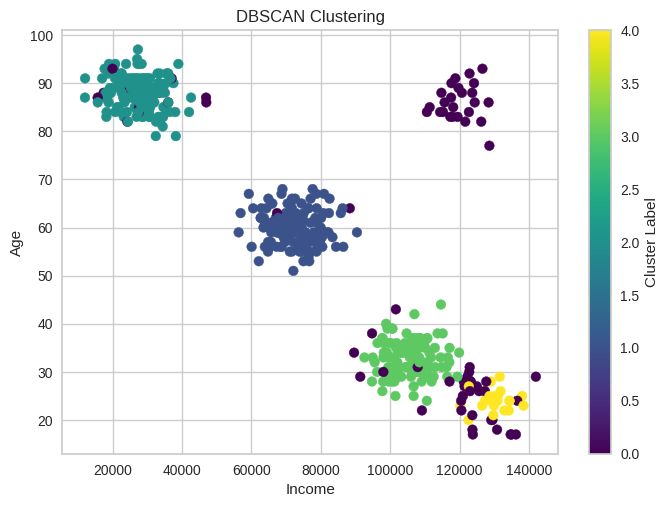

In [24]:
import matplotlib.pyplot as plt

# Convert cluster labels to a numeric format
# 'Cluster -1' for noise points will be handled separately
cluster_labels = dbscan_results['Cluster'].astype('category').cat.codes

# Now use these numeric labels for coloring
plt.scatter(data['Income'], data['Age'], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Income')
plt.ylabel('Age')

# Optionally, add a colorbar to understand which color corresponds to which cluster
plt.colorbar(label='Cluster Label')

plt.show()